# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# limpando os dados da tabela para ter apenas as variáveis necessárias:
previsao_raw = pd.read_csv('previsao_de_renda.csv')
previsao_raw = previsao_raw.drop_duplicates()
previsao_raw.drop(('Unnamed: 0'), axis=1, inplace=True)
previsao_raw.drop(('mau'), axis=1, inplace=True)
previsao_raw.drop(('index'), axis=1, inplace=True)
previsao_raw = previsao_raw.dropna()
previsao_raw.isna().sum()

data_ref                 0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [2]:
previsao_raw.dtypes

data_ref                  object
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [3]:
previsao_raw.columns

Index(['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [4]:
previsao_raw

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14996,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14997,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,1586.85
14998,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


In [5]:
previsao_raw['data_ref'] = pd.to_datetime(previsao_raw['data_ref'])

In [6]:
previsao_raw['sexo'] = previsao_raw.sexo.map({'F': 1, 'M':0})
previsao_raw.sexo.unique()

array([1, 0], dtype=int64)

In [7]:
previsao_raw['posse_de_veiculo'] = previsao_raw['posse_de_veiculo'].astype(int)
previsao_raw.posse_de_veiculo.unique()

array([0, 1])

In [8]:
previsao_raw['posse_de_imovel'] = previsao_raw['posse_de_imovel'].astype(int)
previsao_raw.posse_de_imovel.unique()

array([1, 0])

In [9]:
previsao_raw.dtypes

data_ref                 datetime64[ns]
sexo                              int64
posse_de_veiculo                  int32
posse_de_imovel                   int32
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
renda                           float64
dtype: object

In [10]:
renda = previsao_raw[['tipo_renda', 'educacao', 'estado_civil', 'tempo_emprego', 'renda']]
round(renda.groupby(['tipo_renda', 'educacao', 'tempo_emprego'])['renda'].mean().to_frame(), 2)

renda
tipo_renda       educacao            tempo_emprego         
Assalariado      Primário            0.679452       2593.35
                                     0.780822       1052.50
                                     0.846575       3414.36
                                     0.901370       6145.34
                                     1.194521       2670.16
...                                                     ...
Servidor público Superior incompleto 9.780822       2935.11
                                     12.523288      1516.39
                                     14.263014      3914.95
                                     21.060274       832.99
                                     22.112329      8326.89

[4170 rows x 1 columns]

In [11]:
previsao_raw.dtypes

data_ref                 datetime64[ns]
sexo                              int64
posse_de_veiculo                  int32
posse_de_imovel                   int32
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
renda                           float64
dtype: object

### Fazer um clustermap para verificar as variáveis mais relevantes.

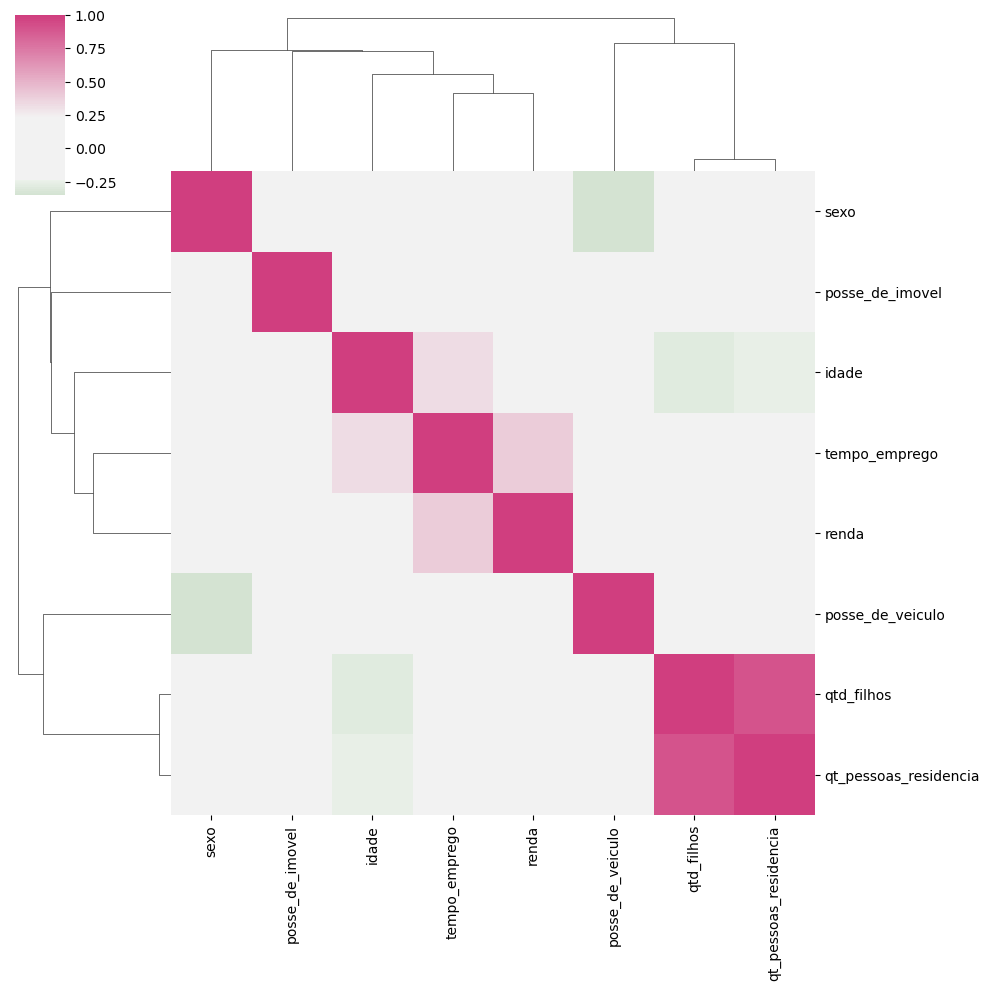

In [12]:
previsao_1 = previsao_raw[['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
                          'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(previsao_1.corr(), figsize=(10, 10), center = 0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

### Fazer gráficos de dispersão com as variáveis que eu considerei mais relevantes para correlacionar com a renda.

In [13]:
previsao_concat = previsao_1[['tempo_emprego', 'renda']]
previsao_rank = pd.concat([previsao_concat, previsao_concat.rank()], axis=1)
previsao_rank.columns = ['tempo_emprego', 'renda', 'tempo_emprego_rank', 'renda_rank']
previsao_rank

,tempo_emprego,renda,tempo_emprego_rank,renda_rank
0,3.575342,3369.24,3694.5,6141.5
1,0.860274,6096.14,910.0,9516.5
2,8.065753,5658.98,7951.0,9118.0
3,1.208219,7246.69,1343.0,10289.0
4,13.873973,4017.37,10618.5,7226.5
...,...,...,...,...
14995,2.046575,1193.29,2250.0,1108.5
14996,12.079452,2519.18,10073.5,4352.5
14997,2.161644,1586.85,2325.5,1973.5
14998,3.295890,6975.39,3417.0,10134.5


In [14]:
q1_emprego = previsao_rank['tempo_emprego_rank'].quantile(0.25)
q3_emprego = previsao_rank['tempo_emprego_rank'].quantile(0.75)

In [15]:
q1_renda = previsao_rank['renda_rank'].quantile(0.25)
q3_renda = previsao_rank['renda_rank'].quantile(0.75)

In [16]:
interquartil = previsao_rank[(previsao_rank['tempo_emprego_rank'] >= q1_emprego) &
                             (previsao_rank['tempo_emprego_rank'] <= q3_emprego) & 
                             (previsao_rank['renda_rank'] >= q1_renda) & 
                             (previsao_rank['renda_rank'] <= q3_renda)]
interquartil.reset_index()

,index,tempo_emprego,renda,tempo_emprego_rank,renda_rank
0,0,3.575342,3369.24,3694.5,6141.5
1,2,8.065753,5658.98,7951.0,9118.0
2,8,3.430137,5577.82,3526.5,9046.0
3,10,5.638356,3109.79,5889.0,5659.0
4,11,4.479452,2779.67,4698.5,4954.5
...,...,...,...,...,...
3288,14979,5.723288,3370.22,6010.0,6144.5
3289,14981,8.893151,3883.98,8580.0,7023.0
3290,14984,6.934247,3279.96,7142.5,5982.5
3291,14985,9.852055,2896.55,9156.0,5193.5


In [17]:
outliers = previsao_rank[~((previsao_rank['tempo_emprego_rank'] >= q1_emprego) & 
                           (previsao_rank['tempo_emprego_rank'] <= q3_emprego) & 
                           (previsao_rank['renda_rank'] >= q1_renda) & 
                           (previsao_rank['renda_rank'] <= q3_renda))]
outliers.reset_index()

,index,tempo_emprego,renda,tempo_emprego_rank,renda_rank
0,1,0.860274,6096.14,910.0,9516.5
1,3,1.208219,7246.69,1343.0,10289.0
2,4,13.873973,4017.37,10618.5,7226.5
3,5,15.561644,5483.58,11085.5,8956.5
4,6,5.046575,1947.99,5356.0,2904.0
...,...,...,...,...,...
9168,14995,2.046575,1193.29,2250.0,1108.5
9169,14996,12.079452,2519.18,10073.5,4352.5
9170,14997,2.161644,1586.85,2325.5,1973.5
9171,14998,3.295890,6975.39,3417.0,10134.5


In [18]:
print(f'''As posições definidas pelo rank e interquaritl que foram considerados outliers são:
            - menores que o 25% na variável emprego: {q1_emprego}
            - menores que o 25% na variável emprego: {q1_renda}
            - maiores que o 75% na variável emprego: {q3_emprego}
            - maiores que o 75% na variável emprego: {q3_renda}''')

As posições definidas pelo rank e interquaritl que foram considerados outliers são:
            - menores que o 25% na variável emprego: 3124.0
            - menores que o 25% na variável emprego: 3117.5
            - maiores que o 75% na variável emprego: 9347.5
            - maiores que o 75% na variável emprego: 9349.5


,tempo_emprego,renda,tempo_emprego_rank,renda_rank
tempo_emprego,1.000000,0.394235,0.885458,0.355046
renda,0.394235,1.000000,0.301799,0.755517
tempo_emprego_rank,0.885458,0.301799,1.000000,0.323453
renda_rank,0.355046,0.755517,0.323453,1.000000


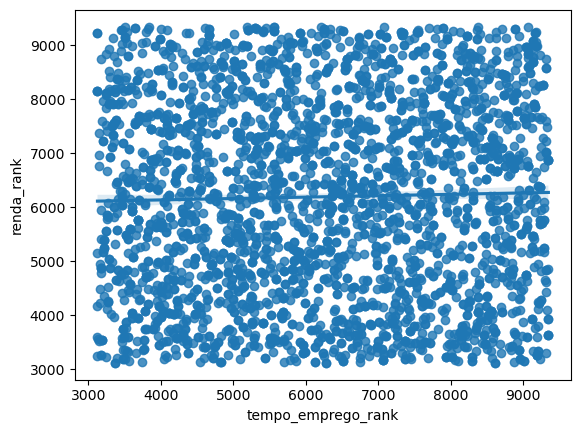

In [19]:
# Dados do Interquartil
rendaxtempo_emprego = sns.regplot(x='tempo_emprego_rank', y='renda_rank', data = interquartil)
previsao_rank.corr()

,tempo_emprego,renda,tempo_emprego_rank,renda_rank
tempo_emprego,1.000000,0.394235,0.885458,0.355046
renda,0.394235,1.000000,0.301799,0.755517
tempo_emprego_rank,0.885458,0.301799,1.000000,0.323453
renda_rank,0.355046,0.755517,0.323453,1.000000


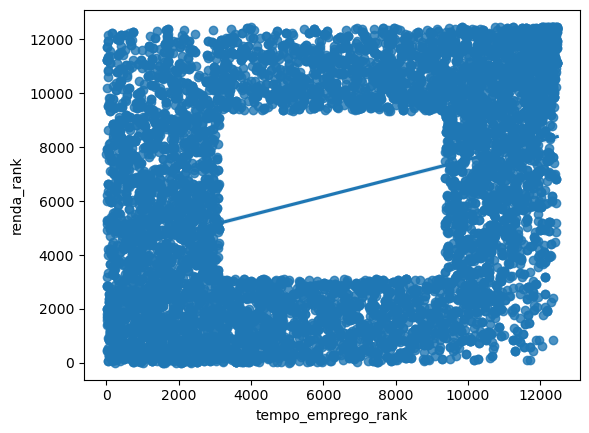

In [20]:
# Outlier
rendaxtempo_emprego = sns.regplot(x='tempo_emprego_rank', y='renda_rank', data = outliers)
previsao_rank.corr()

3) Na su aopinião, há outliers na variável renda?

Um insight relevante da análise de dados é que, ao comparar as matrizes de correlação entre as variáveis sem rank e com rank, podemos observar que a correlação nas sem rank é de quase 40% o que é razável e nas com rank cai ainda mais, cerca de 32% na correlação. Essa constatação ainda não ficou muito clara e destaca que ainda é importante investigar e remover possíveis valores atípicos para garantir que as análises sejam mais precisas e reflitam melhor as relações entre as variáveis.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

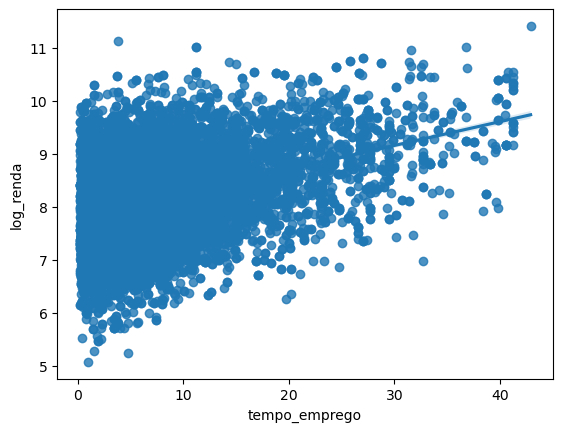

In [21]:
previsao_log = previsao_concat.copy()
previsao_log['log_renda'] = np.log(previsao_log['renda'])

previsao_log
_ = sns.regplot(x='tempo_emprego', y='log_renda', data = previsao_log)

In [22]:
previsao_log.corr()

,tempo_emprego,renda,log_renda
tempo_emprego,1.000000,0.394235,0.379556
renda,0.394235,1.000000,0.836656
log_renda,0.379556,0.836656,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Na análise dos dados a transformação da variável renda usando o logaritmo foi útil para melhorar a distribuição dos dados. No entanto, mesmo após essa transformação, a correlação entre as variáveis ainda foi consideravelmente baixa, aproximadamente 38%. Isso sugere que outros fatores podem influenciar a relação entre as variáveis estudadas, destacando a complexidade do fenômeno analisado e a necessidade de explorar mais profundamente os dados para compreender as relações.